## Scaling Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

from wrangle import wrangle_zillow
from prepare import split_data
from prepare import min_max_scale

In [3]:
#acquire and clean the data
df = wrangle_zillow()
df.head()

Reading from csv file...


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [6]:
#Split the data
train_val, test = train_test_split(df, train_size = 0.8, random_state=123)
train, validate = train_test_split(train_val, train_size = 0.7, random_state=123)

train.shape, validate.shape, test.shape

((1038469, 7), (445059, 7), (370883, 7))

In [9]:
x_train = train.drop(columns='taxvaluedollarcnt')
x_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
894603,4.0,2.0,1694.0,1972.0,5289.08,6111.0
221576,3.0,3.0,2284.0,1990.0,5242.36,6037.0
2076709,3.0,2.5,1799.0,1968.0,766.38,6059.0
1051548,3.0,1.0,1024.0,1949.0,899.90,6037.0
1575943,2.0,1.0,660.0,1924.0,1533.73,6037.0


In [11]:
y_train = train[['taxvaluedollarcnt']]
y_train.head()

,taxvaluedollarcnt
894603,393986.0
221576,411257.0
2076709,79563.0
1051548,50267.0
1575943,120734.0


---

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

### Min-Max Scaling

In [8]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(x_train)

MinMaxScaler()

In [13]:
x_train_scaled = scaler.transform(x_train)

In [18]:
x_train_scaled

array([[0.66666667, 0.33333333, 0.49662658, 0.78947368, 0.50876621,
        1.        ],
       [0.33333333, 0.66666667, 0.66969786, 0.87559809, 0.50425616,
        0.        ],
       [0.33333333, 0.5       , 0.5274274 , 0.77033493, 0.07217422,
        0.2972973 ],
       ...,
       [1.        , 1.        , 0.78703432, 0.67464115, 0.36822021,
        0.        ],
       [0.66666667, 0.33333333, 0.3948372 , 0.74162679, 0.5123196 ,
        0.        ],
       [0.33333333, 0.33333333, 0.34702259, 0.73684211, 0.20577174,
        0.        ]])

In [21]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
894603,0.666667,0.333333,0.496627,0.789474,0.508766,1.000000
221576,0.333333,0.666667,0.669698,0.875598,0.504256,0.000000
2076709,0.333333,0.500000,0.527427,0.770335,0.072174,0.297297
1051548,0.333333,0.000000,0.300088,0.679426,0.085063,0.000000
1575943,0.000000,0.000000,0.193312,0.559809,0.146249,0.000000


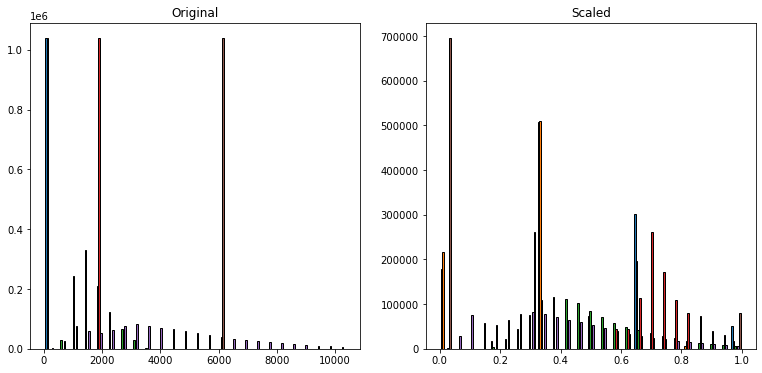

In [14]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

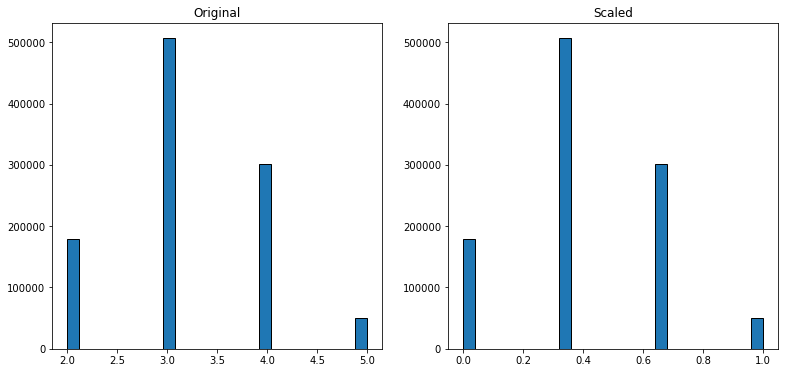

In [19]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.bedroomcnt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled[:, 0], bins=25, ec='black')
plt.title('Scaled')
plt.show()

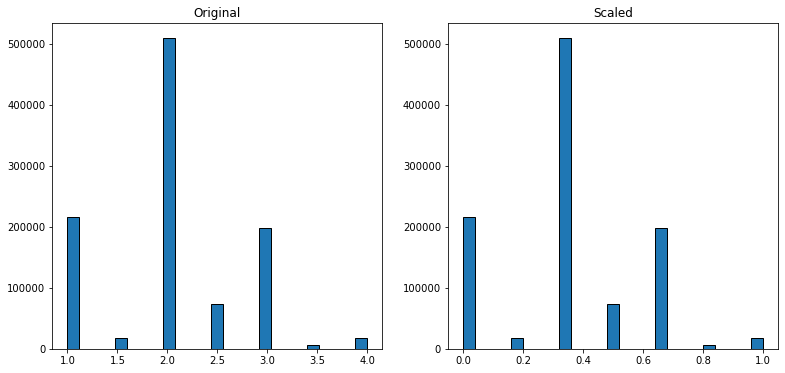

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.bathroomcnt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.bathroomcnt, bins=25, ec='black')
plt.title('Scaled')
plt.show()

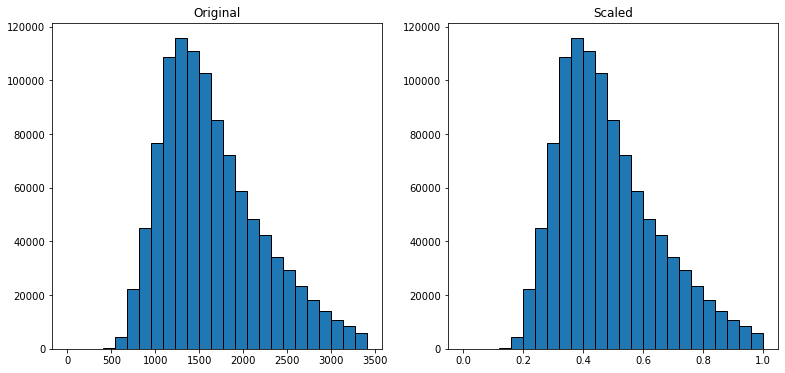

In [23]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled')
plt.show()

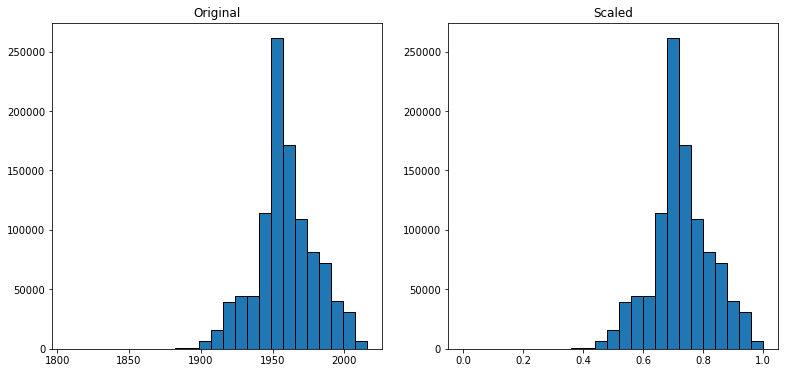

In [24]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.yearbuilt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.yearbuilt, bins=25, ec='black')
plt.title('Scaled')
plt.show()

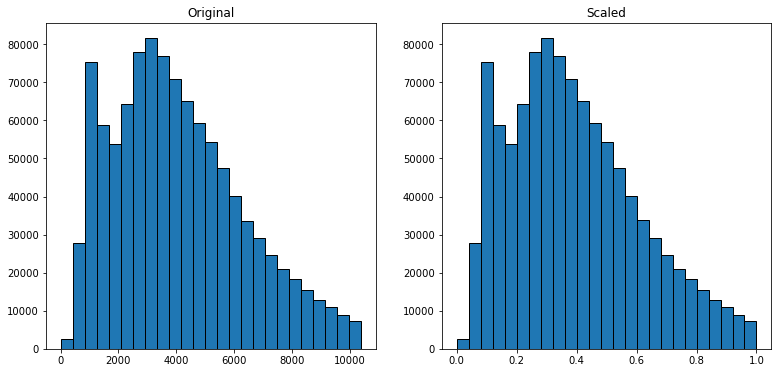

In [25]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

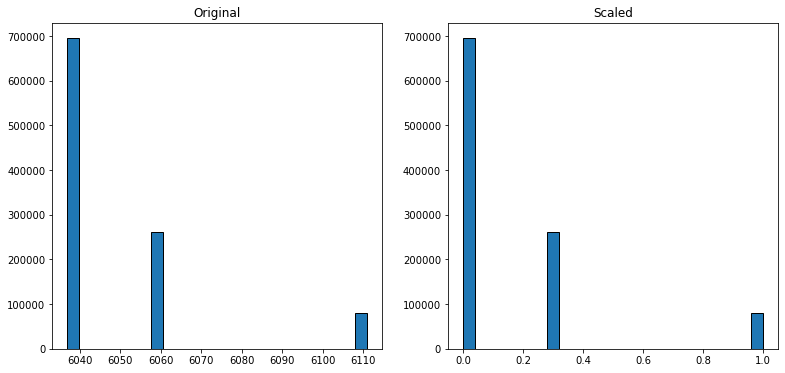

In [26]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.fips, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.fips, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Standard Scaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(x_train)

StandardScaler()

In [29]:
x_train_scaled = scaler.transform(x_train)

In [30]:
x_train_scaled

array([[ 1.00427765, -0.07569118,  0.07119014,  0.61208005,  0.54470691,
         3.05087093],
       [-0.27516549,  1.33781477,  1.11639691,  1.48843242,  0.52386432,
        -0.55199943],
       [-0.27516549,  0.63106179,  0.25720152,  0.41733508, -1.47294669,
         0.51912419],
       ...,
       [ 2.2837208 ,  2.75132072,  1.82501166, -0.55638977, -0.10480829,
        -0.55199943],
       [ 1.00427765, -0.07569118, -0.54353315,  0.12521763,  0.56112848,
        -0.55199943],
       [-0.27516549, -0.07569118, -0.83229367,  0.07653139, -0.85554299,
        -0.55199943]])

In [31]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
894603,1.004278,-0.075691,0.071190,0.612080,0.544707,3.050871
221576,-0.275165,1.337815,1.116397,1.488432,0.523864,-0.551999
2076709,-0.275165,0.631062,0.257202,0.417335,-1.472947,0.519124
1051548,-0.275165,-1.489197,-1.115740,-0.507704,-1.413381,-0.551999
1575943,-1.554609,-1.489197,-1.760579,-1.724860,-1.130619,-0.551999


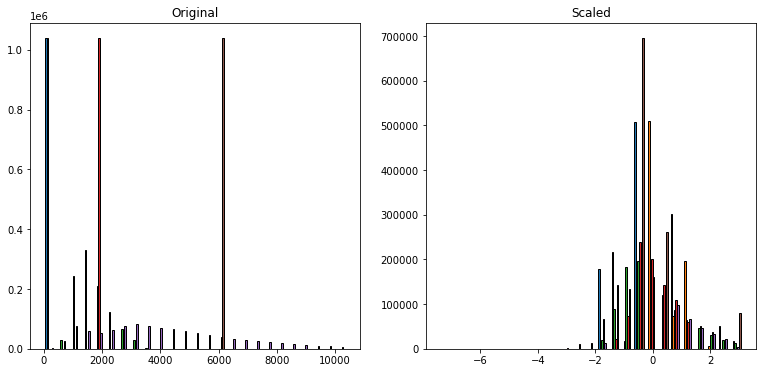

In [32]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

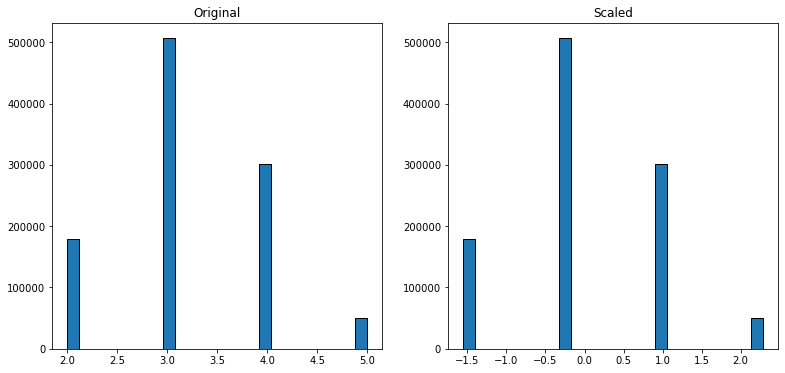

In [33]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.bedroomcnt, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled[:, 0], bins=25, ec='black')
plt.title('Scaled')
plt.show()

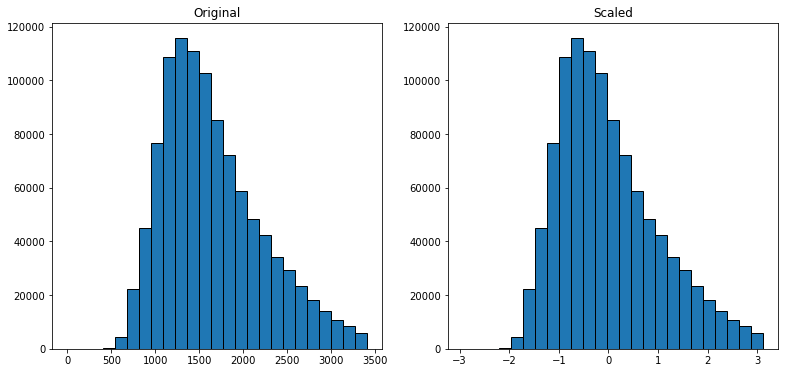

In [34]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled')
plt.show()

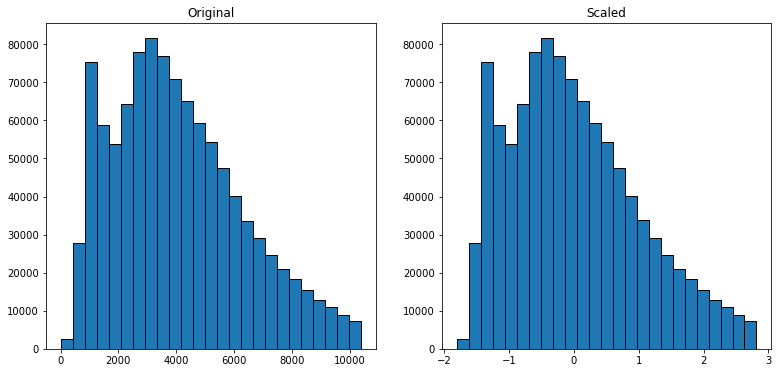

In [35]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Robust Scaler

In [36]:
scaler = RobustScaler()

In [37]:
scaler.fit(x_train)

RobustScaler()

In [38]:
x_train_scaled = scaler.transform(x_train)

In [39]:
x_train_scaled

array([[ 1.        ,  0.        ,  0.19286658,  0.65217391,  0.49413062,
         3.36363636],
       [ 0.        ,  2.        ,  0.97225892,  1.43478261,  0.47915832,
         0.        ],
       [ 0.        ,  1.        ,  0.33157199,  0.47826087, -0.95525296,
         1.        ],
       ...,
       [ 2.        ,  4.        ,  1.5006605 , -0.39130435,  0.02755069,
         0.        ],
       [ 1.        ,  0.        , -0.2655218 ,  0.2173913 ,  0.50592707,
         0.        ],
       [ 0.        ,  0.        , -0.48084544,  0.17391304, -0.51174037,
         0.        ]])

In [40]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
894603,1.0,0.0,0.192867,0.652174,0.494131,3.363636
221576,0.0,2.0,0.972259,1.434783,0.479158,0.000000
2076709,0.0,1.0,0.331572,0.478261,-0.955253,1.000000
1051548,0.0,-2.0,-0.692206,-0.347826,-0.912464,0.000000
1575943,-1.0,-2.0,-1.173052,-1.434783,-0.709341,0.000000


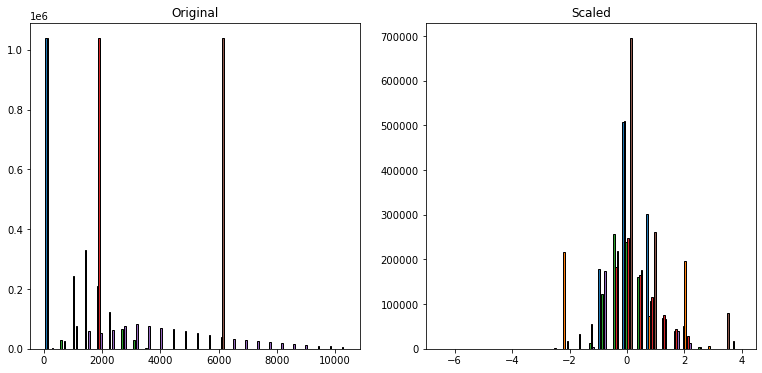

In [41]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

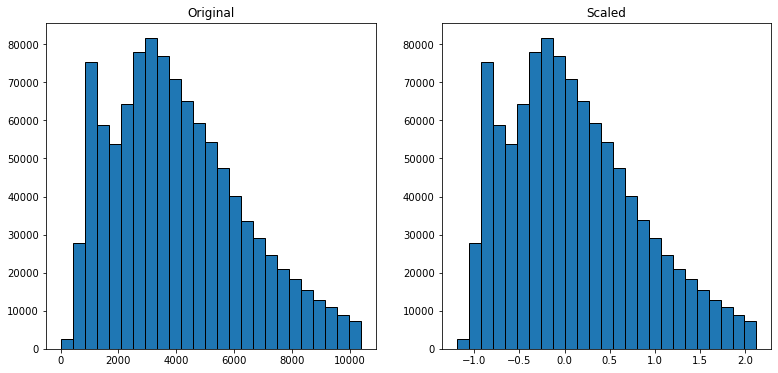

In [42]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train.taxamount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_df.taxamount, bins=25, ec='black')
plt.title('Scaled')
plt.show()

---

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [43]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.inverse_transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
894603,14.0,7.0,5774847.0,413955.0,5.479013e+07,458251.0
221576,11.0,10.0,7786157.0,417717.0,5.430615e+07,452775.0
2076709,11.0,8.5,6132792.0,413119.0,7.939026e+06,454403.0
1051548,11.0,4.0,3490817.0,409148.0,9.322173e+06,452775.0
1575943,8.0,4.0,2249941.0,403923.0,1.588808e+07,452775.0


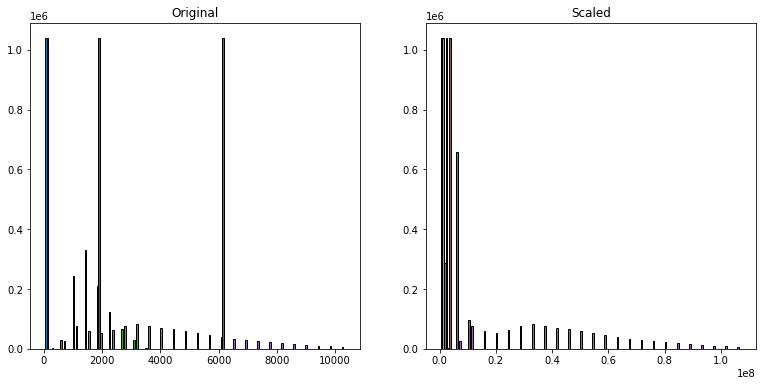

In [44]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

---

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [48]:
scaler = QuantileTransformer(output_distribution='normal', random_state=123)
scaler.fit(x_train)

QuantileTransformer(output_distribution='normal', random_state=123)

In [49]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
894603,0.864365,-0.077862,0.258792,0.670557,0.602415,5.199338
221576,-0.208505,1.179402,1.037507,1.404533,0.585563,-5.199338
2076709,-0.208505,0.673702,0.419741,0.522099,-2.051685,0.828465
1051548,-0.208505,-5.199338,-1.275302,-0.689529,-1.788996,-5.199338
1575943,-5.199338,-5.199338,-2.717905,-1.584354,-1.078633,-5.199338


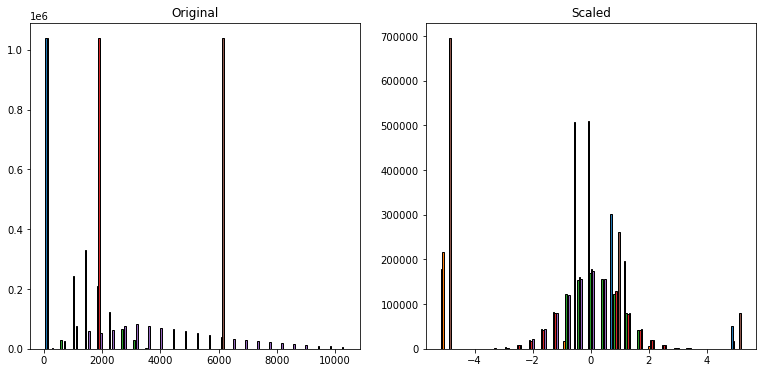

In [50]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

---

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [51]:
scaler = QuantileTransformer(random_state=123)
scaler.fit(x_train)

QuantileTransformer(random_state=123)

In [52]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
894603,0.806306,0.468969,0.602102,0.748749,0.726551,1.000000
221576,0.417417,0.880881,0.850250,0.919920,0.720915,0.000000
2076709,0.417417,0.749750,0.662663,0.699199,0.020100,0.796296
1051548,0.417417,0.000000,0.101101,0.245245,0.036808,0.000000
1575943,0.000000,0.000000,0.003285,0.056557,0.140376,0.000000


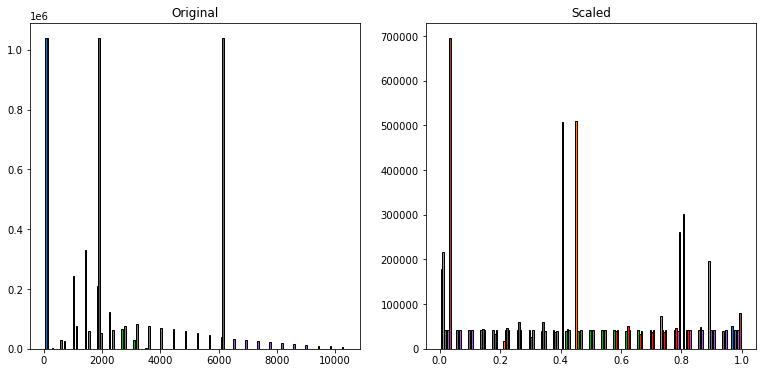

In [53]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

- Defalt argument for output distribution is 'uniform' so when that argument was not in the call it attempted to make the distribution as uniform (flat) as possible

---

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

- The wrangle_zillow function is contained in the wrangle.py file and the split_data and min_max_scale function are contained in the prepare.py file 

In [2]:
df = wrangle_zillow()
df.head()

Reading from csv file...


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [3]:
train, validate, test = split_data(df)
train.shape, validate.shape, test.shape

((1038469, 7), (445059, 7), (370883, 7))

In [4]:
train_scaled, val_scaled, test_scaled = min_max_scale(train, validate, test)

In [5]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
894603,0.666667,0.333333,0.496627,0.414304,0.789474,0.508766,1.000000
221576,0.333333,0.666667,0.669698,0.432467,0.875598,0.504256,0.000000
2076709,0.333333,0.500000,0.527427,0.083648,0.770335,0.072174,0.297297
1051548,0.333333,0.000000,0.300088,0.052839,0.679426,0.085063,0.000000
1575943,0.000000,0.000000,0.193312,0.126944,0.559809,0.146249,0.000000


In [6]:
val_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1807884,0.333333,0.666667,0.829275,0.657194,0.913876,0.862503,0.297297
1201426,0.333333,0.666667,0.588736,0.507306,0.736842,0.556818,0.000000
479199,0.000000,0.000000,0.236726,0.244218,0.636364,0.280828,0.000000
169853,0.000000,0.500000,0.430625,0.552082,0.856459,0.561657,0.297297
1590914,0.666667,0.333333,0.493106,0.585781,0.755981,0.609678,0.297297


In [7]:
test_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1183751,0.333333,0.500000,0.693752,0.479381,0.918660,0.701611,0.297297
1018254,0.333333,0.333333,0.486066,0.700959,0.559809,0.779113,0.000000
1923571,0.333333,0.000000,0.261074,0.037824,0.674641,0.080959,0.000000
544174,0.666667,0.666667,0.423291,0.471107,0.751196,0.572169,0.000000
370274,0.333333,0.333333,0.496627,0.790042,0.693780,0.835111,0.000000
